<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.505139,34.904729,96.263672,55.126590,0.001902,253.802031,253.800099,0.001932
1,0.0,1.0,29.133067,95.427375,72.752950,68.438407,-0.001285,275.750514,275.751881,-0.001367
2,0.0,2.0,83.549462,42.780076,95.632244,81.290125,0.001733,313.253640,313.252545,0.001095
3,0.0,3.0,39.794469,82.839526,33.159453,85.263321,0.000134,251.056904,251.056789,0.000115
4,0.0,4.0,98.261062,27.833738,39.827788,85.968379,-0.000053,261.890914,261.891328,-0.000414
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.702211,80.071633,60.050656,73.172905,-0.000145,300.997260,300.997357,-0.000097
119996,999.0,116.0,55.062366,92.652324,96.151935,32.011787,0.000803,285.879216,285.879244,-0.000028
119997,999.0,117.0,90.915877,90.071537,80.269711,35.632256,0.000314,306.889697,306.889439,0.000257
119998,999.0,118.0,56.675498,76.500775,54.496803,88.775063,0.000132,286.448271,286.448404,-0.000133


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    57.505139  34.904729  96.263672  55.126590  0.001902  253.802031   
      1.0    29.133067  95.427375  72.752950  68.438407 -0.001285  275.750514   
      2.0    83.549462  42.780076  95.632244  81.290125  0.001733  313.253640   
      3.0    39.794469  82.839526  33.159453  85.263321  0.000134  251.056904   
      4.0    98.261062  27.833738  39.827788  85.968379 -0.000053  261.890914   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.702211  80.071633  60.050656  73.172905 -0.000145  300.997260   
      116.0  55.062366  92.652324  96.151935  32.011787  0.000803  285.879216   
      117.0  90.915877  90.071537  80.269711  35.632256  0.000314  306.889697   
      118.0  56.675498  76.500775  54.496803  88.775063  0.000132  286.448271   
      119.0  44.232572  40.299008  77.366823  68.333345 -0.000899  240.230849   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    253.800099  0.001932  
      1.0    275.751881 -0.001367  
      2.0    313.252545  0.001095  
      3.0    251.056789  0.000115  
      4.0    261.891328 -0.000414  
...                 ...       ...  
999.0 115.0  300.997357 -0.000097  
      116.0  285.879244 -0.000028  
      117.0  306.889439  0.000257  
      118.0  286.448404 -0.000133  
      119.0  240.230966 -0.000117  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    57.505139  34.904729  96.263672  55.126590  0.001902  253.802031   
      1.0    29.133067  95.427375  72.752950  68.438407 -0.001285  275.750514   
      2.0    83.549462  42.780076  95.632244  81.290125  0.001733  313.253640   
      3.0    39.794469  82.839526  33.159453  85.263321  0.000134  251.056904   
      4.0    98.261062  27.833738  39.827788  85.968379 -0.000053  261.890914   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.702211  80.071633  60.050656  73.172905 -0.000145  300.997260   
      116.0  55.062366  92.652324  96.151935  32.011787  0.000803  285.879216   
      117.0  90.915877  90.071537  80.269711  35.632256  0.000314  306.889697   
      118.0  56.675498  76.500775  54.496803  88.775063  0.000132  286.448271   
      119.0  44.232572  40.299008  77.366823  68.333345 -0.000899  240.230849   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    253.800099  0.001932  
      1.0    275.751881 -0.001367  
      2.0    313.252545  0.001095  
      3.0    251.056789  0.000115  
      4.0    261.891328 -0.000414  
...                 ...       ...  
999.0 115.0  300.997357 -0.000097  
      116.0  285.879244 -0.000028  
      117.0  306.889439  0.000257  
      118.0  286.448404 -0.000133  
      119.0  240.230966 -0.000117  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.505139,34.904729,96.263672,55.126590,0.001902,253.802031,253.800099,0.001932
1,0.0,1.0,29.133067,95.427375,72.752950,68.438407,-0.001285,275.750514,275.751881,-0.001367
2,0.0,2.0,83.549462,42.780076,95.632244,81.290125,0.001733,313.253640,313.252545,0.001095
3,0.0,3.0,39.794469,82.839526,33.159453,85.263321,0.000134,251.056904,251.056789,0.000115
4,0.0,4.0,98.261062,27.833738,39.827788,85.968379,-0.000053,261.890914,261.891328,-0.000414
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.702211,80.071633,60.050656,73.172905,-0.000145,300.997260,300.997357,-0.000097
119996,999.0,116.0,55.062366,92.652324,96.151935,32.011787,0.000803,285.879216,285.879244,-0.000028
119997,999.0,117.0,90.915877,90.071537,80.269711,35.632256,0.000314,306.889697,306.889439,0.000257
119998,999.0,118.0,56.675498,76.500775,54.496803,88.775063,0.000132,286.448271,286.448404,-0.000133


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    57.505139  34.904729  96.263672  55.126590  0.001902  253.802031   
      1.0    29.133067  95.427375  72.752950  68.438407 -0.001285  275.750514   
      2.0    83.549462  42.780076  95.632244  81.290125  0.001733  313.253640   
      3.0    39.794469  82.839526  33.159453  85.263321  0.000134  251.056904   
      4.0    98.261062  27.833738  39.827788  85.968379 -0.000053  261.890914   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.702211  80.071633  60.050656  73.172905 -0.000145  300.997260   
      116.0  55.062366  92.652324  96.151935  32.011787  0.000803  285.879216   
      117.0  90.915877  90.071537  80.269711  35.632256  0.000314  306.889697   
      118.0  56.675498  76.500775  54.496803  88.775063  0.000132  286.448271   
      119.0  44.232572  40.299008  77.366823  68.333345 -0.000899  240.230849   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    253.800099  0.001932  
      1.0    275.751881 -0.001367  
      2.0    313.252545  0.001095  
      3.0    251.056789  0.000115  
      4.0    261.891328 -0.000414  
...                 ...       ...  
999.0 115.0  300.997357 -0.000097  
      116.0  285.879244 -0.000028  
      117.0  306.889439  0.000257  
      118.0  286.448404 -0.000133  
      119.0  240.230966 -0.000117  

[120000 rows x 8 columns]

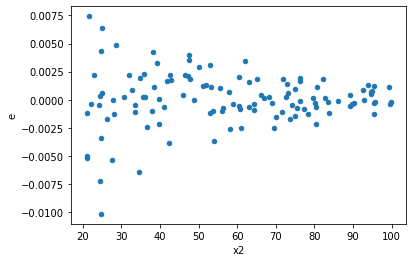

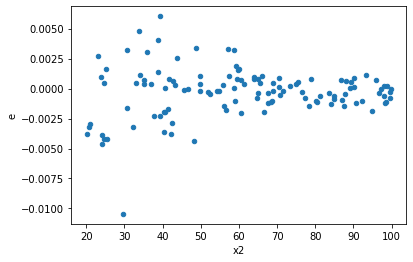

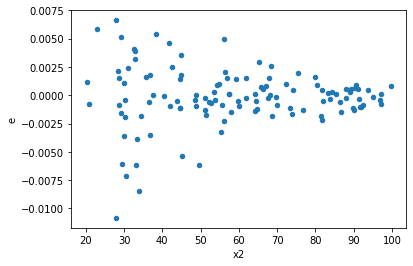

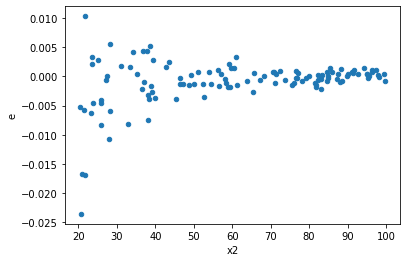

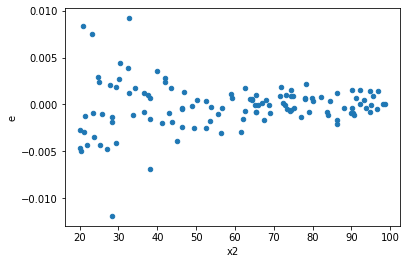

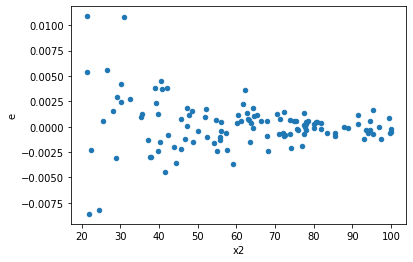

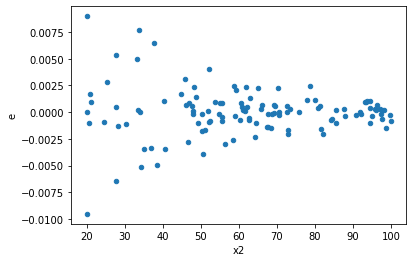

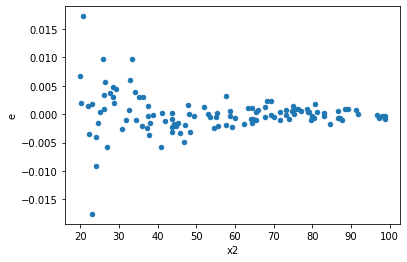

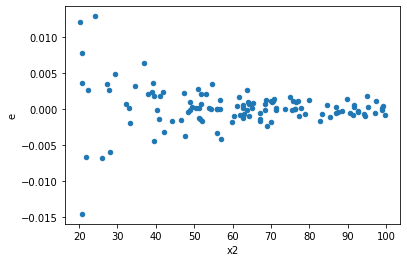

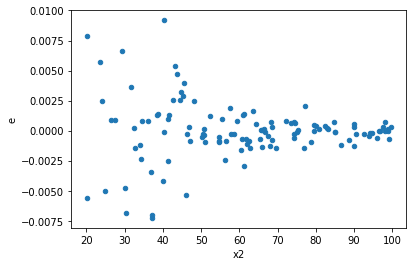

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,66.0,0.00025984634864098234,0.00040151256765601017,5.648833666108312e-06,6.0835237523637905e-06,1.0769521837514031,0.7729816056578274,0.6135091971710863,0.3864908028289137,Reject005=1 : Homoscedasticity
2.0,55.0,57.0,0.00035243557644122316,0.0003678833907720835,6.407919571658603e-06,6.4540945749488325e-06,1.0072059274112077,0.9773931360302655,0.5113034319848673,0.4886965680151327,Reject005=1 : Homoscedasticity
5.0,51.0,61.0,0.00022321064399089636,0.00044778771625522787,4.3766792939391445e-06,7.34078223369226e-06,1.6772492889432922,0.05350476187247266,0.9732476190637637,0.02675238093623633,Reject005=1 : Homoscedasticity
6.0,65.0,47.0,0.00026941274602216046,0.00028550115220377824,4.144811477264007e-06,6.074492600080388e-06,1.4655654746666944,0.16989401284602224,0.9150529935769889,0.08494700642301112,Reject005=1 : Homoscedasticity
8.0,60.0,52.0,0.00037173478896555573,0.0006121808368698934,6.195579816092595e-06,1.1772708401344104e-05,1.900178635543569,0.019211584536855675,0.9903942077315722,0.009605792268427837,Reject005=0 : Heteroscedasticity
11.0,60.0,52.0,0.00018594572627755537,0.0005655843255419149,3.0990954379592563e-06,1.0876621645036824e-05,3.5096117117964725,8.293095814293494e-06,0.9999958534520929,4.146547907146747e-06,Reject005=0 : Heteroscedasticity
12.0,42.0,70.0,0.00014397472616280933,0.0008676809661108706,3.4279696705430793e-06,1.2395442373012437e-05,3.615972008016243,2.002813748847032e-06,0.9999989985931256,1.001406874423516e-06,Reject005=0 : Heteroscedasticity
13.0,37.0,75.0,3.3688149672464594e-05,0.0007834562845777865,9.104905316882322e-07,1.0446083794370488e-05,11.473028472906085,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
15.0,70.0,42.0,0.00013368464251671295,0.000594725893901249,1.9097806073816137e-06,1.4160140330982118e-05,7.41453770985571,3.121252145632525e-10,0.9999999998439374,1.5606260728162624e-10,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,66.0,0.00025984634864098234,0.00040151256765601017,5.648833666108312e-06,6.0835237523637905e-06,1.0769521837514031,0.7729816056578274,Reject005=1 : Homoscedasticity
1.0,61.0,51.0,0.0004331636601936625,4.154686705066177e-05,7.101043609732172e-06,8.146444519737602e-07,0.11472179256261261,2.604399004765618e-14,Reject005=0 : Heteroscedasticity
2.0,55.0,57.0,0.00035243557644122316,0.0003678833907720835,6.407919571658603e-06,6.4540945749488325e-06,1.0072059274112077,0.9773931360302655,Reject005=1 : Homoscedasticity
3.0,58.0,54.0,0.0016213561220600236,3.7654433813351766e-05,2.7954415897586613e-05,6.973043298768845e-07,0.02494433553652197,4.399267597511049e-31,Reject005=0 : Heteroscedasticity
4.0,55.0,57.0,0.0005798903322825813,0.00017639847381683706,1.0543460586956025e-05,3.0947100669620538e-06,0.2935193849722086,9.978769573343397e-06,Reject005=0 : Heteroscedasticity
5.0,51.0,61.0,0.00022321064399089636,0.00044778771625522787,4.3766792939391445e-06,7.34078223369226e-06,1.6772492889432922,0.05350476187247266,Reject005=1 : Homoscedasticity
6.0,65.0,47.0,0.00026941274602216046,0.00028550115220377824,4.144811477264007e-06,6.074492600080388e-06,1.4655654746666944,0.16989401284602224,Reject005=1 : Homoscedasticity
7.0,50.0,62.0,0.0012170420734443,9.320159938574568e-05,2.4340841468886e-05,1.5032516029958982e-06,0.06175840736309175,1.2214611658003601e-18,Reject005=0 : Heteroscedasticity
8.0,60.0,52.0,0.00037173478896555573,0.0006121808368698934,6.195579816092595e-06,1.1772708401344104e-05,1.900178635543569,0.019211584536855675,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    631
Reject005=1 : Homoscedasticity      369
Name: Result_test, dtype: int64